<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Joan Fernando Cevallos Sarango  <br>
Fecha: 27/07/2022

# Importación de librerias necesarias

In [25]:
#Para esta actividad se importarán las siguientes librerías:
# load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import collections
#Importamos la libreria numpy
import numpy as np


## Cargar el Dataset

In [6]:
#Código para cargar el Dataset
# load dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [8]:
#desplegar la descripción del dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000
mean,60.117503,0.430524,523.310364,0.379271,38.882118,0.293280,269033.600188,1.334163,136.602506,0.648633,0.306378,167.111048,0.166287
std,11.086665,0.495291,725.247313,0.485344,11.290583,0.455395,103014.930450,0.911237,4.246571,0.477533,0.461120,62.746664,0.372444
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,52.750000,0.000000,115.000000,0.000000,30.000000,0.000000,220000.000000,0.900000,134.000000,0.000000,0.000000,107.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,200.000000,0.000000
75%,66.250000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,139.000000,1.000000,1.000000,213.250000,0.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


## Descripción de la fuente del Dataset

Este dataset titulado "Predicción de insuficiencia cardíaca" cuenta con 1757 datos los cuales se pueden descargar libremente en el siguiente link: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## Explique el problema a resolver. 

Mediate este dataset lo que se pretende detectar el estado de salud de una persona por medio de ciertos análisis de datos que nos presenta esta se enfoca en la prediccion de insuficiencia cardica, a parti de ellos podremos saber que tan deteriorada se encuentra su salud (corazon) y poder predecir de mejor manera nuestra variable Y en función a todas las variables X

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [7]:

#Código que responde a la descripción anterior
#Permite contar cuantos valores existen en nuestro dataset
df.count()

age                         1756
anaemia                     1756
creatinine_phosphokinase    1756
diabetes                    1756
ejection_fraction           1756
high_blood_pressure         1756
platelets                   1756
serum_creatinine            1756
serum_sodium                1756
sex                         1756
smoking                     1756
time                        1756
DEATH_EVENT                 1756
dtype: int64

In [20]:
# determine target (dependent) and feature (independent) variables
feature_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
X = pima[feature_cols] # features
y = pima.DEATH_EVENT # target

Como primera parte se importaron todas las librerías necesarias, además se cargó nuestro dataset mediante un archivo .csv, cargado nuestro dataset se lo analizo y encontró nuestra variable dependiente/objetivo que en este caso es “**DEATH_EVENT:**” el tiempo de evento de muerte que puede ocasionar y además se definió nuestra variables independientes entrada tales como, age	
anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets,serum_creatinine,serum_sodium, sex, smoking y time, 

### Número de atributos de entrada, su significado y tipo


-->**age** edad - continuo

-->**anaemia** - categorico 

-->**creatinine_phosphokinase** - continuo

-->**diabetes**  - categorico

-->**ejection_fraction** - continuo

-->**high_blood_pressure** - categorico

-->**platelets** - continuo

-->**serum_creatinine**  - continuo

-->**serum_sodium**  - continuo

-->**sex** sexo - categorico

-->**smoking**  - categorico

-->**time**    - categorico

-->**DEATH_EVENT** - categorico



### Estadistica de la variable objetivo

In [12]:
#Permite vizualisar la estadistica de la variable obejtivo
muerte = df['DEATH_EVENT']
#Imprime la informacion
muerte.describe()

count    1756.000000
mean        0.166287
std         0.372444
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DEATH_EVENT, dtype: float64

### Estadistica de los atributos

In [15]:
#Estadísticas de la variable objetivo.
#Preparación para la estaditica de variable objetivo
salida = df['DEATH_EVENT']
#Presentacion de la variable objetivo
salida.describe()

count    1756.000000
mean        0.166287
std         0.372444
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:>

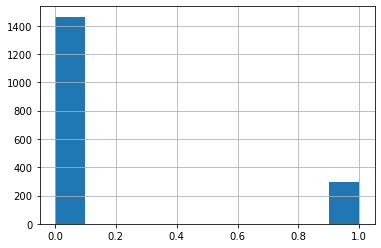

In [16]:
#Crea gráfico de barras como la variable objetivo continua.
df['DEATH_EVENT'].hist()

## División del dataset en datos de entrenamiento y datos de test 

In [ ]:
# determine target (dependent) and feature (independent) variables
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose','BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols] # features
y = pima.Outcome # target

In [21]:
# split dataset into training and test set (70:30) ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

## Modelamiento

In [23]:
# compute accuracy (i.e., how often is the classifier correct?)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9715370018975332


In [28]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus